<a href="https://colab.research.google.com/github/KavyaAS07/MLprojects/blob/main/livercirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/liver_cirrhosis.csvmissing.csv')

In [3]:
#first five rows
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [4]:
#last five rows
df.tail()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [5]:
df.shape

(25000, 19)

In [6]:
#to print all columns
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [7]:
#to print datatypes
df.dtypes

,0
N_Days,int64
Status,object
Drug,object
Age,int64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object
Bilirubin,float64


In [8]:
#Finding the number of rows and columns in the dataset

print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  25000
Number of columns:  19


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    24994 non-null  float64
 11  Albumin        24996 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           24992 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [10]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,24994.000000,24996.000000,25000.000000,25000.000000,24992.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.362038,3.486602,100.184663,1995.675597,123.165493,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.679673,0.380509,73.184840,1798.885660,47.748702,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [11]:
#To find missing valuues
df.isna().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [12]:
# Fill specific columns: SGOT, Cholesterol, and Albumin using their median
columns_to_fill = ['SGOT', 'Cholesterol', 'Albumin']

for col in columns_to_fill:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_value}")
    else:
        print(f"Column '{col}' not found in the dataset.")


Filled missing values in 'SGOT' with median: 122.5563462
Filled missing values in 'Cholesterol' with median: 369.5105634
Filled missing values in 'Albumin' with median: 3.51


<ipython-input-12-0276361c62c2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [13]:
#after removing missing values
df.isna().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [14]:
#Checking for Duplicated data
df.duplicated().sum()

15346

In [15]:
#To drop duplicate values
df.drop_duplicates(inplace=True)

In [16]:
#The values in Age column are given in days, so we convert them into years, since it will be convenient for us to tackle them.
#We also convert the values in column N_Days into years and store them in a new column N_Years for the same reason.
#We drop the column N_Days.

df['Age']=round(df['Age']/365)
df['N_Years'] = round(df['N_Days']/365)
df.drop(['N_Days'],axis=1,inplace=True)

In [17]:
df

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Years
0,C,Placebo,51.0,F,N,Y,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1,6.0
1,C,Placebo,54.0,M,Y,N,Y,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2,3.0
2,C,Placebo,32.0,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2,11.0
3,D,Placebo,45.0,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2,6.0
4,D,Placebo,59.0,F,N,Y,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,C,Placebo,49.0,F,Y,N,Y,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1,10.0
24971,C,Placebo,64.0,F,Y,N,Y,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1,13.0
24972,D,D-penicillamine,67.0,F,N,Y,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3,9.0
24991,C,D-penicillamine,58.0,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2,12.0


In [18]:
df.columns

Index(['Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'N_Years'],
      dtype='object')

In [19]:
#To check the data is balanced on imbalanced
print("No: of class labels",df['Stage'].nunique())
print("class labels",df['Stage'].unique())
df['Stage'].value_counts()

No: of class labels 3
class labels [1 2 3]


,count
Stage,
2,3314
3,3311
1,3029


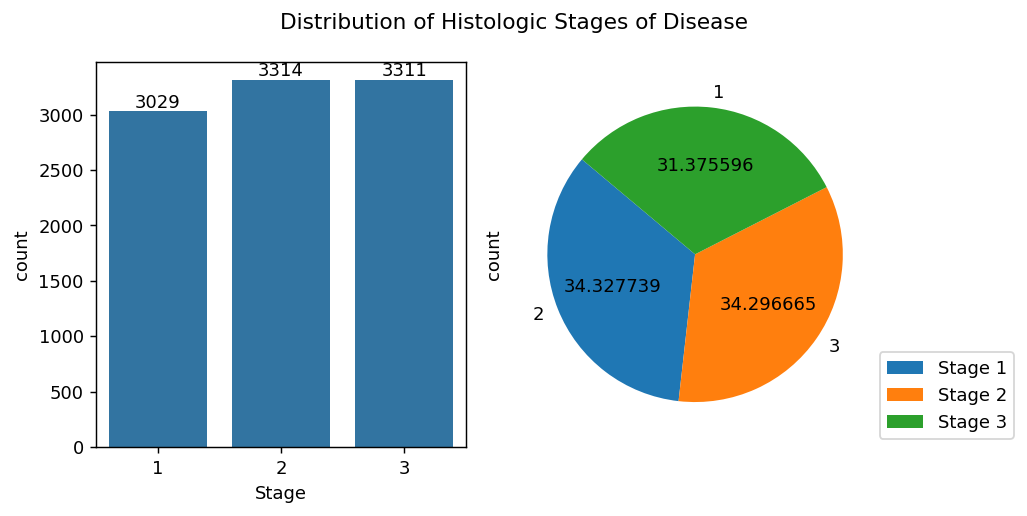

In [20]:
#checking data is balanced or imbalanced

fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=130)
fig.suptitle('Distribution of Histologic Stages of Disease')

a= sns.countplot(data=df,x='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Stage'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,ax=axes[1])
axes[1].legend(['Stage 1', 'Stage 2','Stage 3'],loc=(1,0))

fig.tight_layout();

In [21]:
print(df['Status'].value_counts())

Status
C     5333
D     3710
CL     611
Name: count, dtype: int64


In [22]:
print(df['Drug'].value_counts())

Drug
Placebo            6224
D-penicillamine    3430
Name: count, dtype: int64


EDA

Text(0.5, 1.0, 'Distribution of status of the patient')

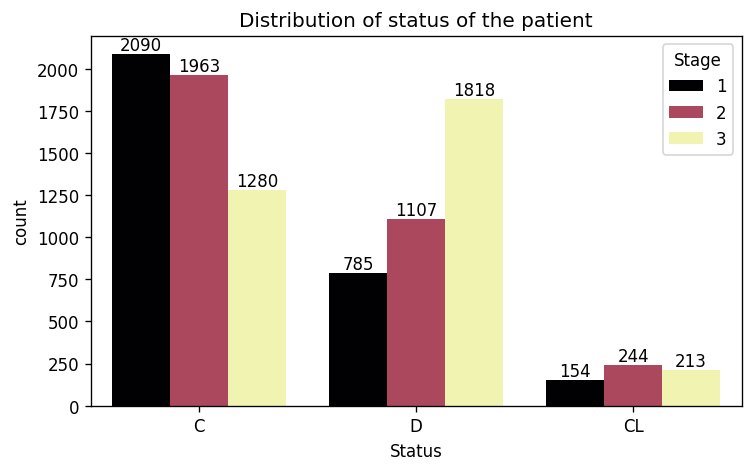

In [23]:
#Distribution of status of the patient
plt.figure(figsize=(7,4),dpi=120)
ax=sns.countplot(data=df,x="Status",palette="inferno",hue='Stage')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of status of the patient')

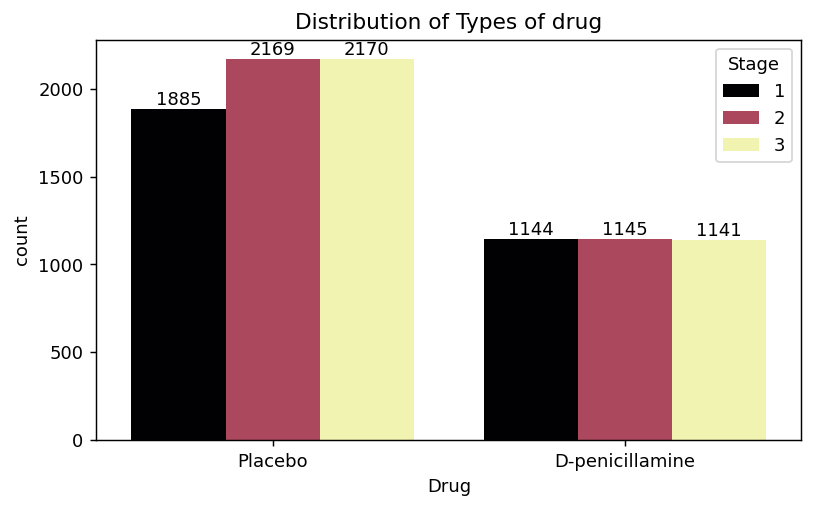

In [24]:
#To represent the number of people that were given placebo or D-penicillamine.
plt.figure(figsize=(7,4),dpi=130)
ax=sns.countplot(data=df,x="Drug",palette='inferno',hue='Stage')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Types of drug');

In [25]:
print(df['Sex'].value_counts())

Sex
F    8574
M    1080
Name: count, dtype: int64


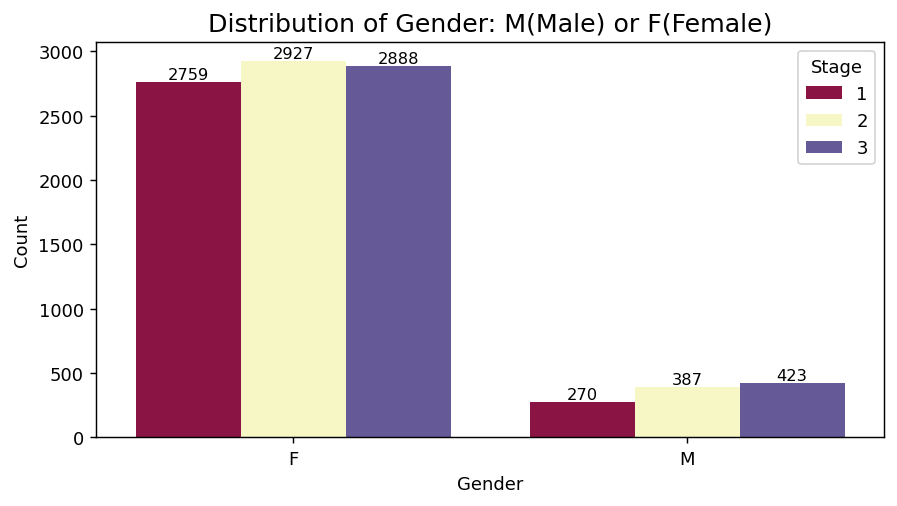

In [26]:
#To represent the number of Stage 1, Stage 2 and Stage 3 patients that were found from the two genders.

# Set up the figure
plt.figure(figsize=(7, 4), dpi=130)
plt.title('Distribution of Gender: M(Male) or F(Female)', fontsize=14)

# Create the countplot with hue by Stage
ax = sns.countplot(data=df, x="Sex", hue="Stage", palette='Spectral')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

# Final layout tweaks
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

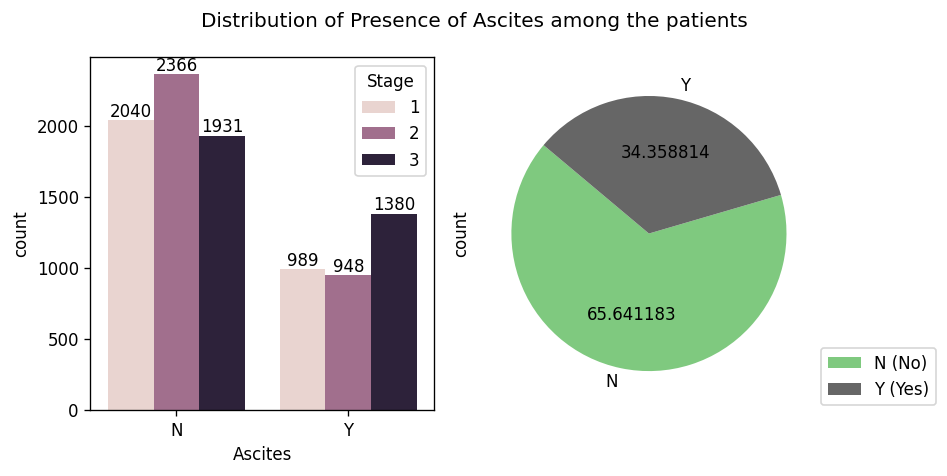

In [27]:
#Distribution of Presence of Ascites among the patients

fig, axes = plt.subplots(1,2,figsize=(8,4),dpi=120)

fig.suptitle('Distribution of Presence of Ascites among the patients')

a =sns.countplot(data=df,x='Ascites',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Ascites'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Accent',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],loc=(1,0))

fig.tight_layout();

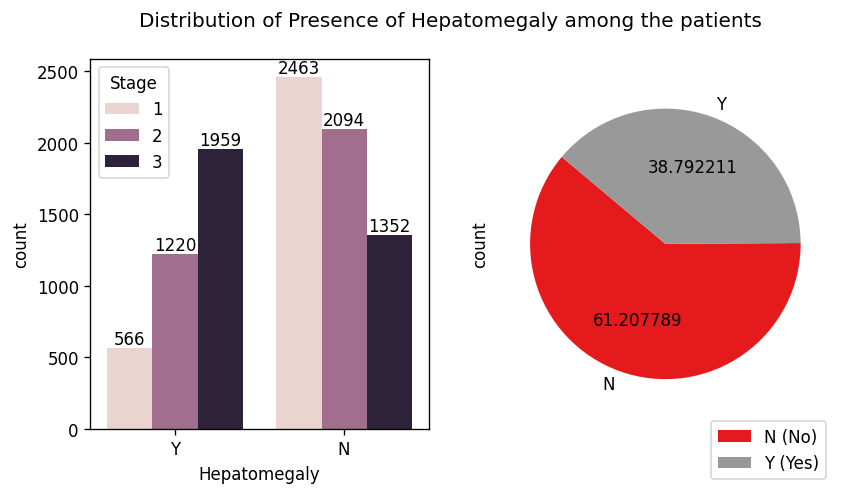

In [28]:
#Distribution of Presence of Hepatomegaly among the patients

fig,axes = plt.subplots(1,2,figsize=(8,4),dpi=120)
fig.suptitle('Distribution of Presence of Hepatomegaly among the patients')

a = sns.countplot(data=df,x='Hepatomegaly',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Hepatomegaly'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Set1',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],bbox_to_anchor=(1, 0));

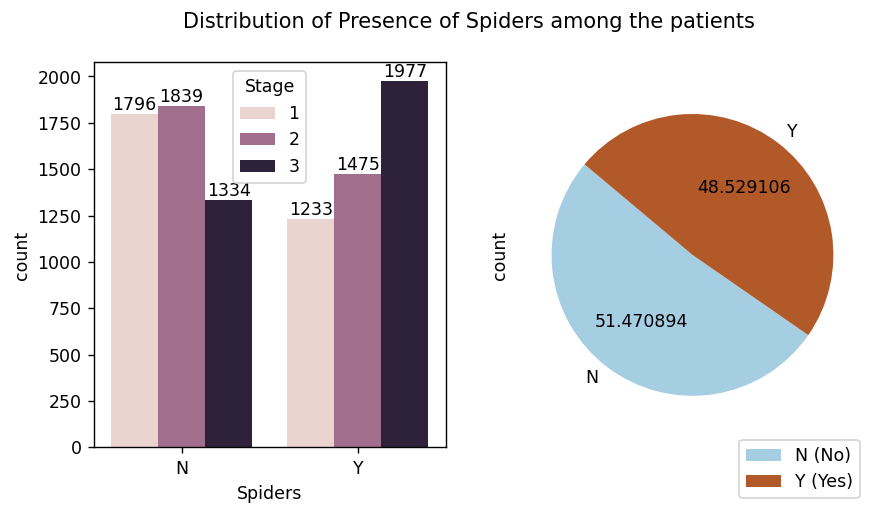

In [29]:
#Distribution of Presence of Spiders among the patients

fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=125)
fig.suptitle('Distribution of Presence of Spiders among the patients');

a= sns.countplot(data=df,x='Spiders',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Spiders'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Paired',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],bbox_to_anchor=(1, 0));

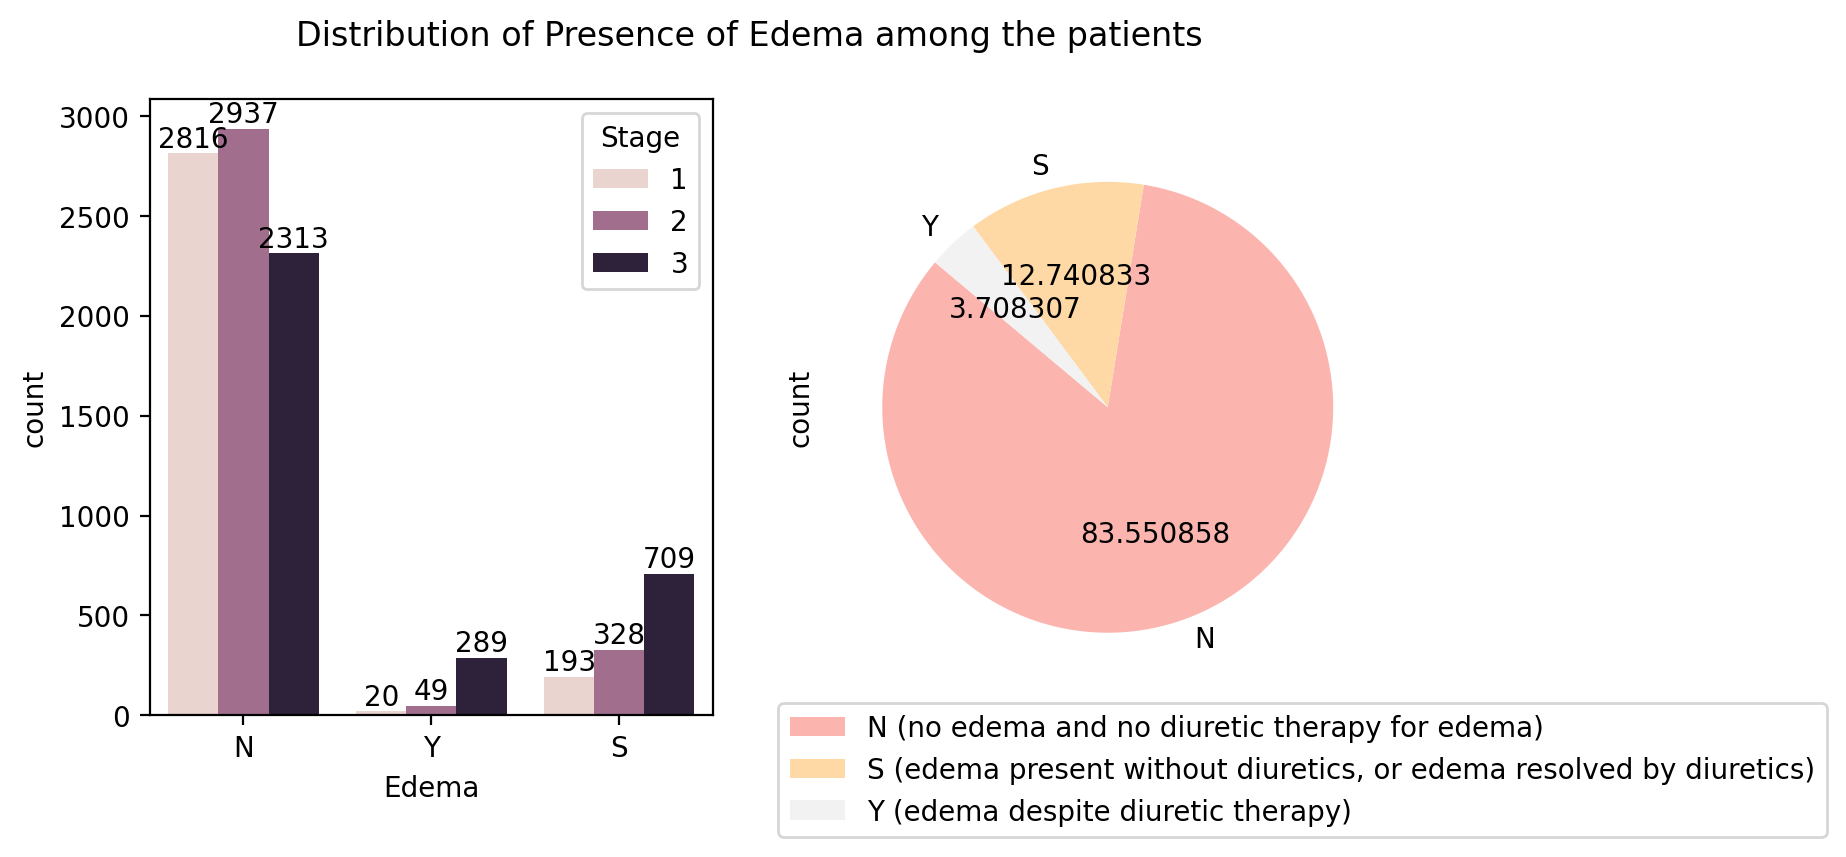

In [30]:
#Distribution of Presence of Edema among the patients

fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=200)
fig.suptitle('Distribution of Presence of Edema among the patients');

a= sns.countplot(data=df,x='Edema',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Edema'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Pastel1',ax=axes[1])
axes[1].legend(['N (no edema and no diuretic therapy for edema)', 'S (edema present without diuretics, or edema resolved by diuretics)', 'Y (edema despite diuretic therapy)'],bbox_to_anchor=(1.8, 0));

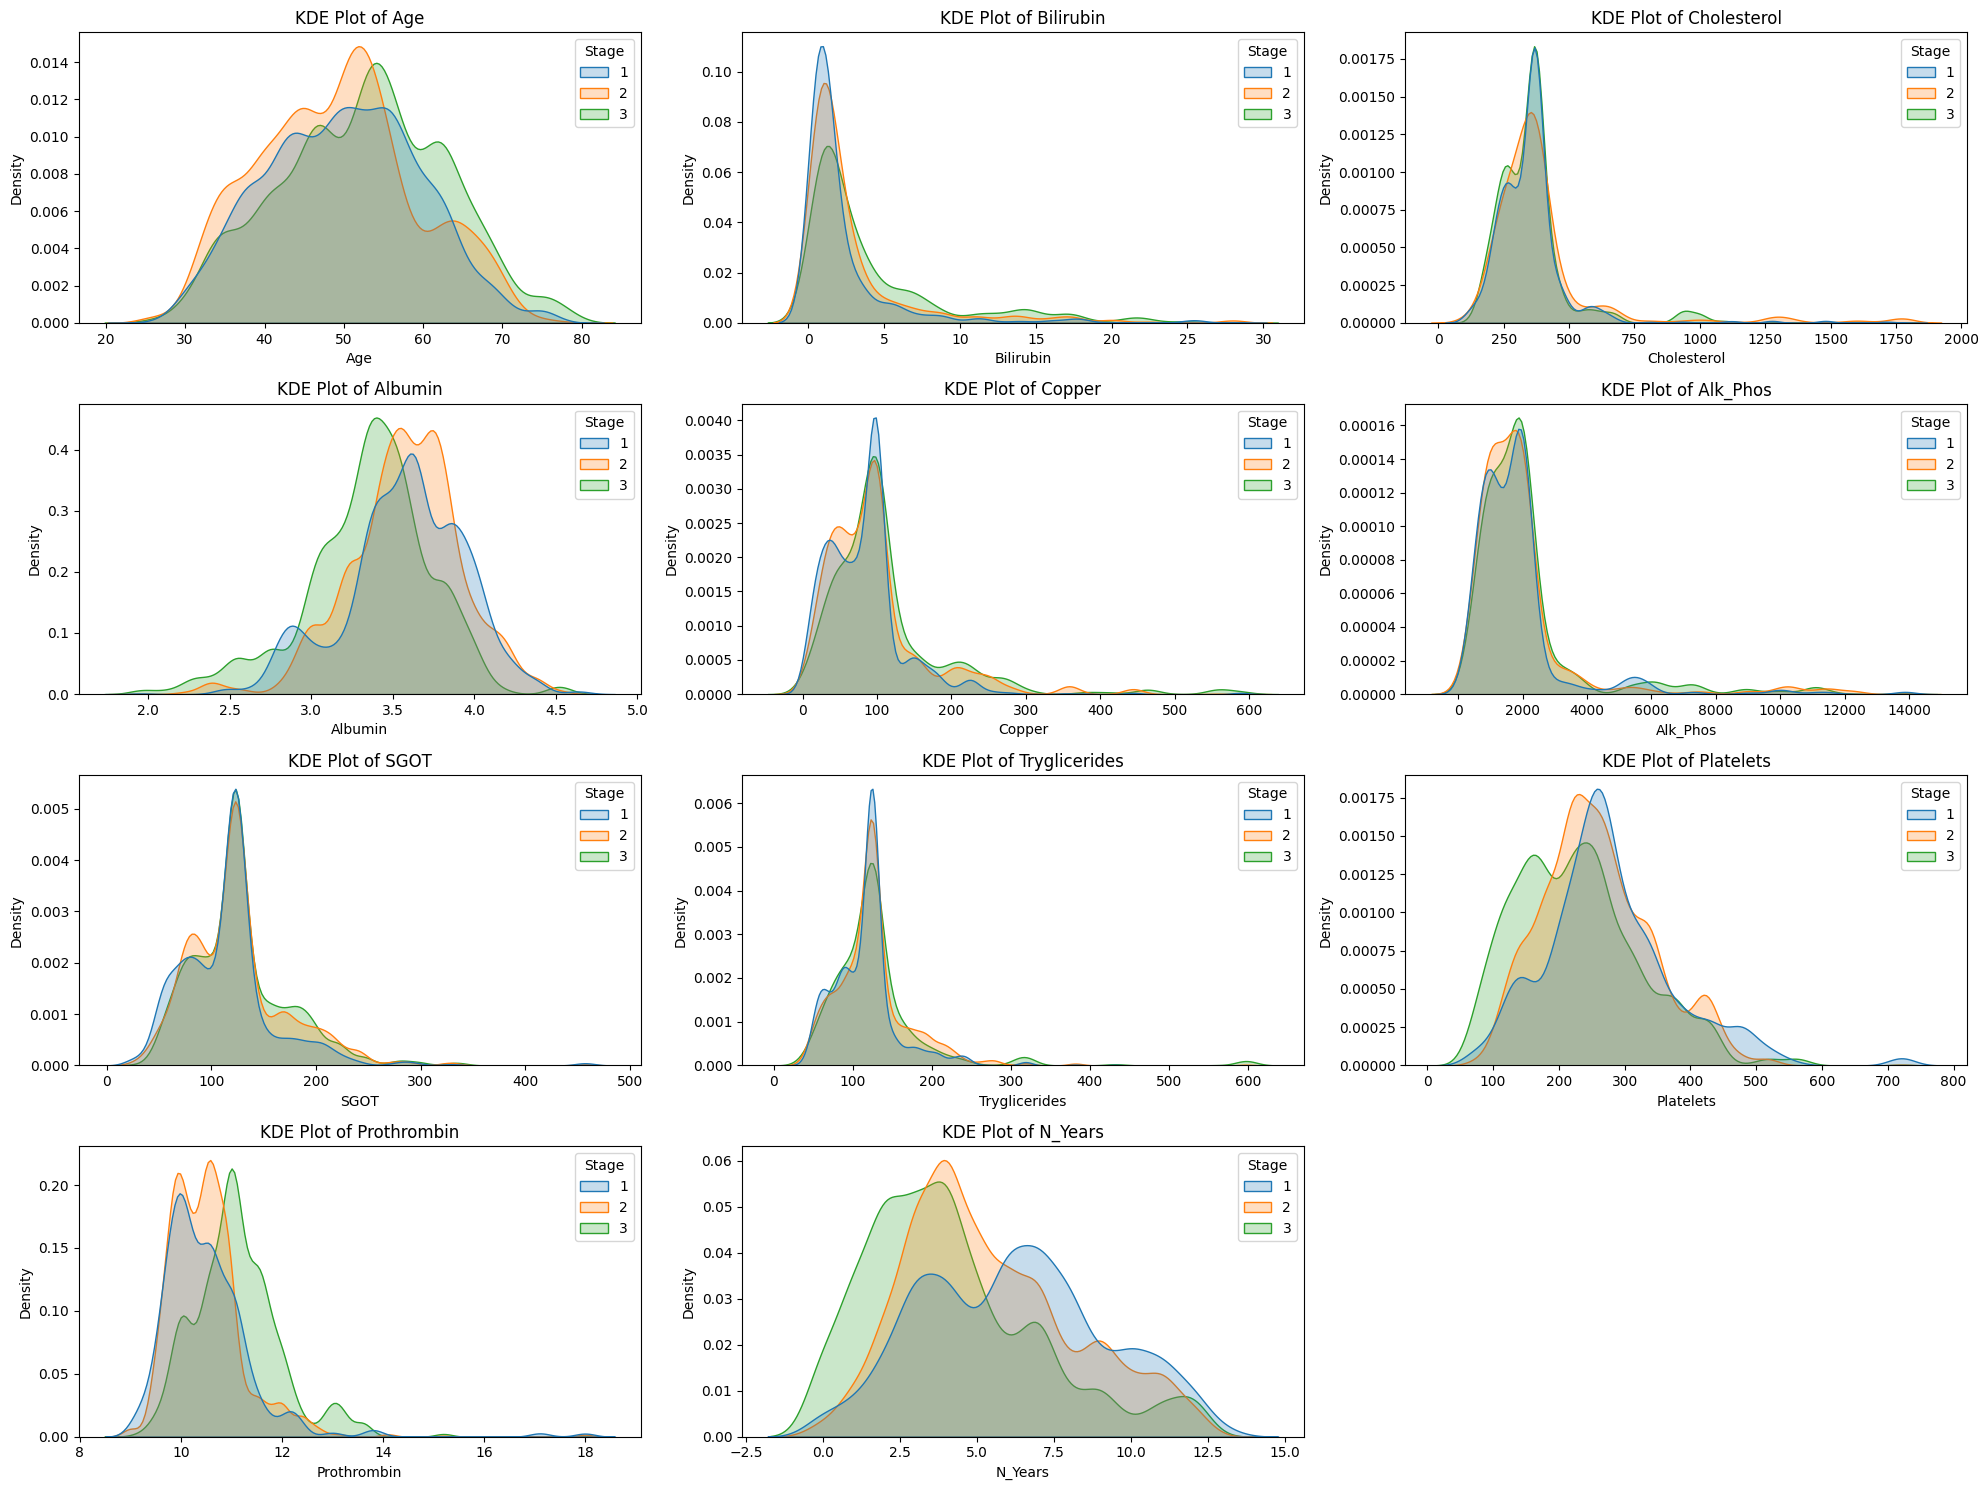

In [31]:
#pair plot

df_num = df.select_dtypes(['int','Float64'])
col = list(df_num.drop('Stage',axis=1).columns)
fig, axes= plt.subplots(4,3,figsize=(20, 15))
k=0
for i in range(4):
    for j in range(3):
        if (k< len(col)):
            sns.kdeplot(data=df,x=col[k],ax=axes[i,j],palette='tab10',fill=True,hue='Stage')
            axes[i,j].set_title(f'KDE Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

<ipython-input-32-faa1fd9b42d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Stage',y=col[k],ax=axes[i,j],palette='tab10')
<ipython-input-32-faa1fd9b42d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Stage',y=col[k],ax=axes[i,j],palette='tab10')
<ipython-input-32-faa1fd9b42d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Stage',y=col[k],ax=axes[i,j],palette='tab10')
<ipython-input-32-faa1fd9b42d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

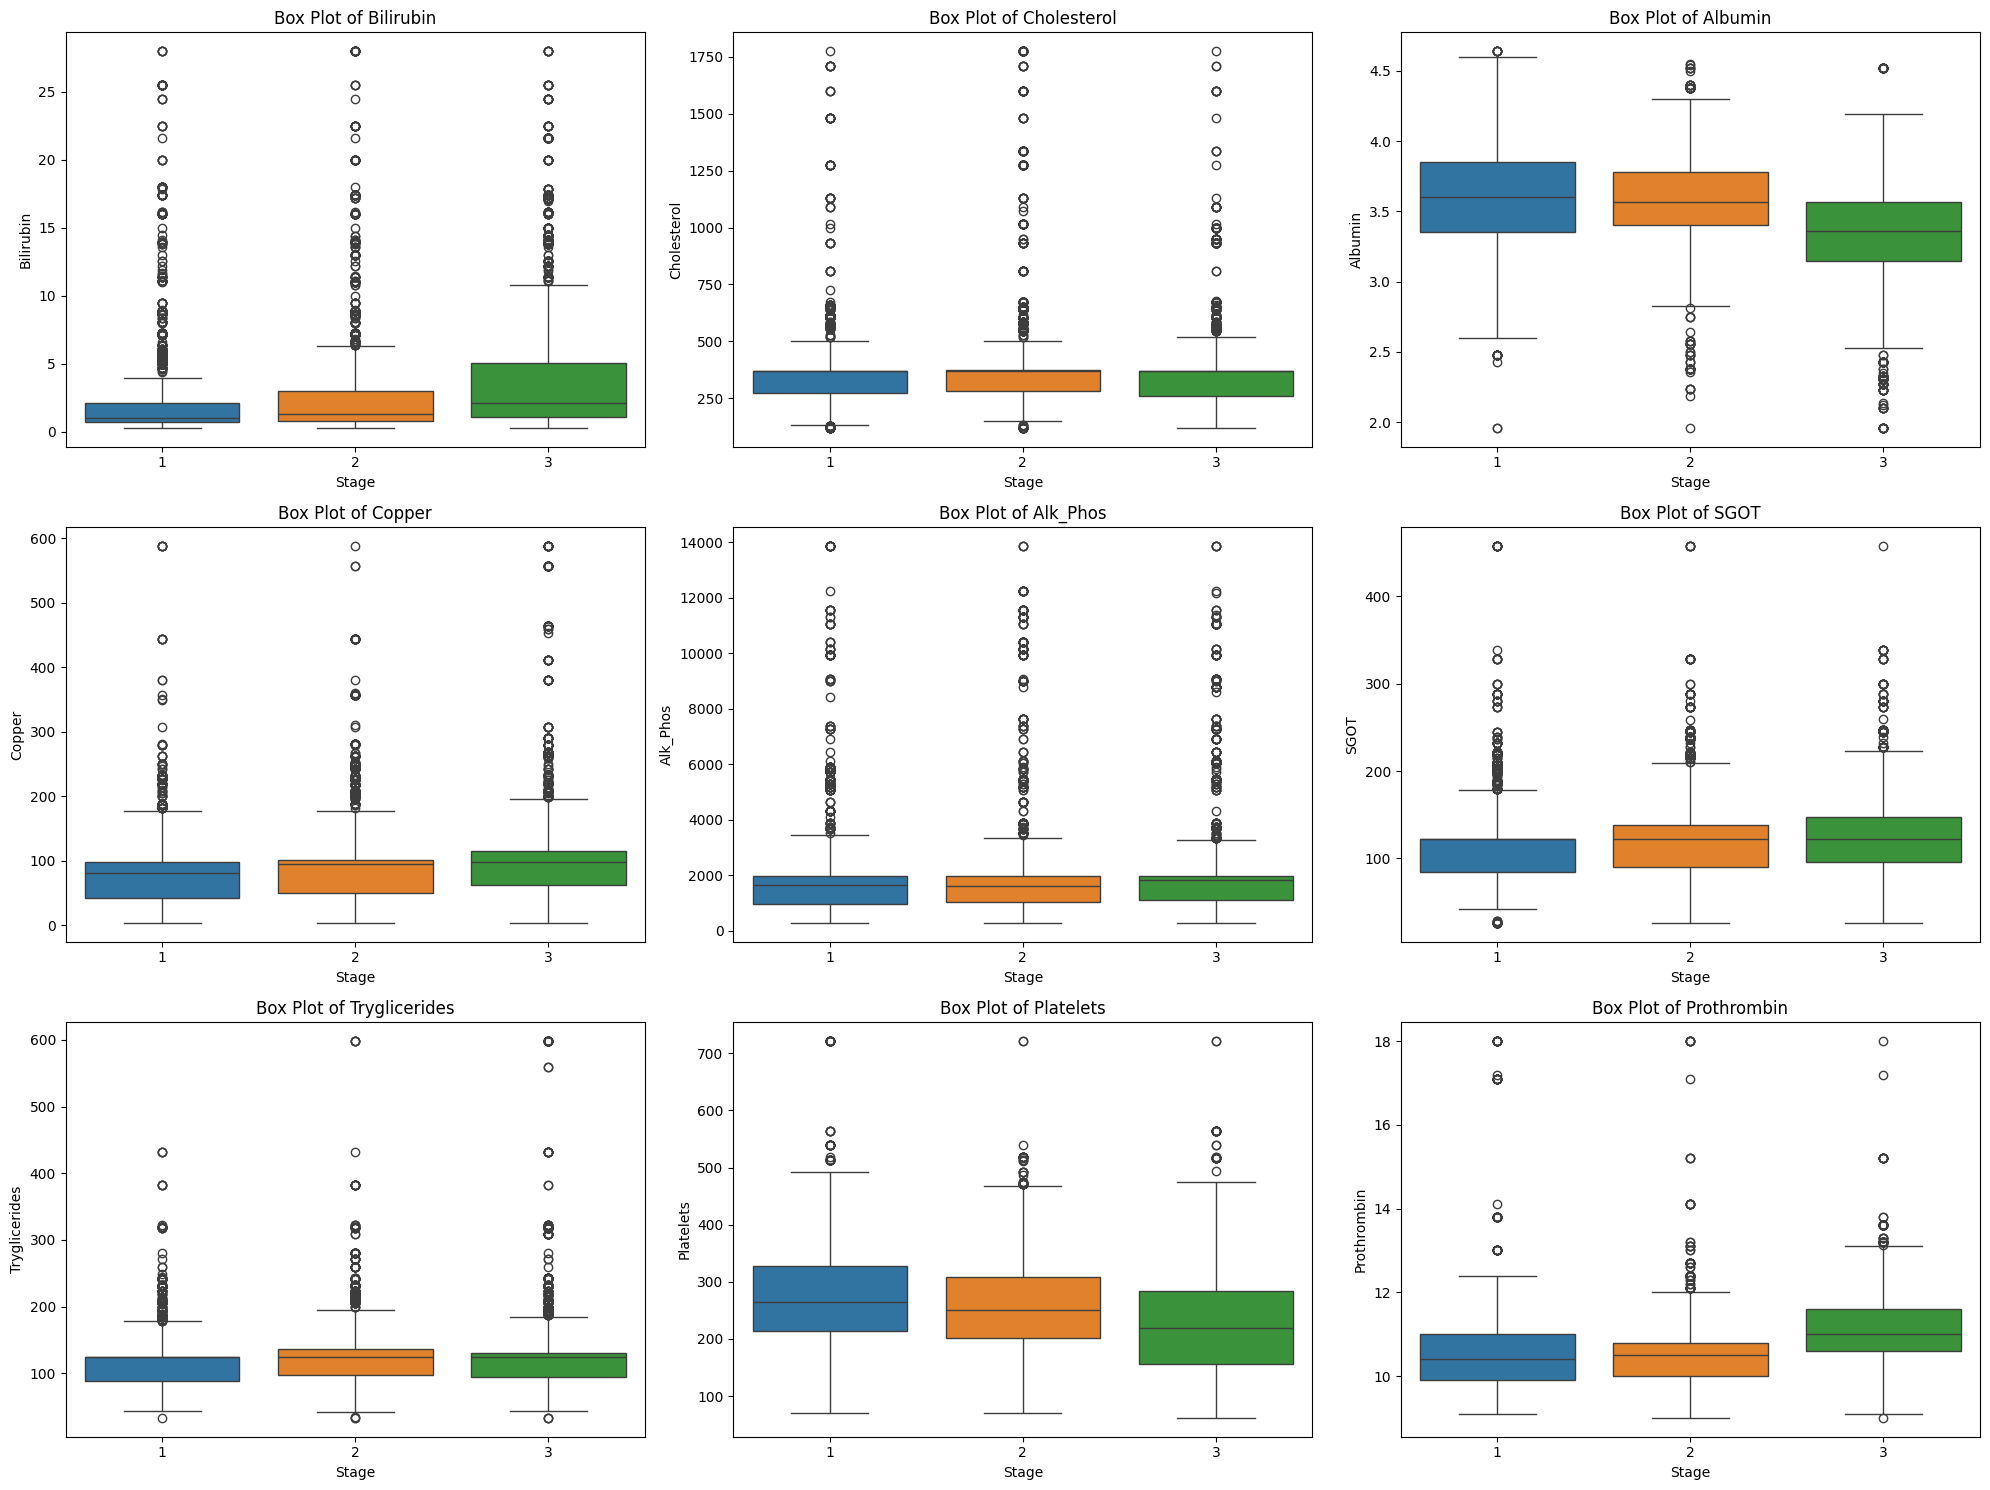

In [32]:
#Checking for outliers
col = list(df_num.drop(['Stage','N_Years','Age'],axis=1).columns)
fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=df,x='Stage',y=col[k],ax=axes[i,j],palette='tab10')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

<ipython-input-33-84a283886059>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Stage',y='Age',palette='tab10');


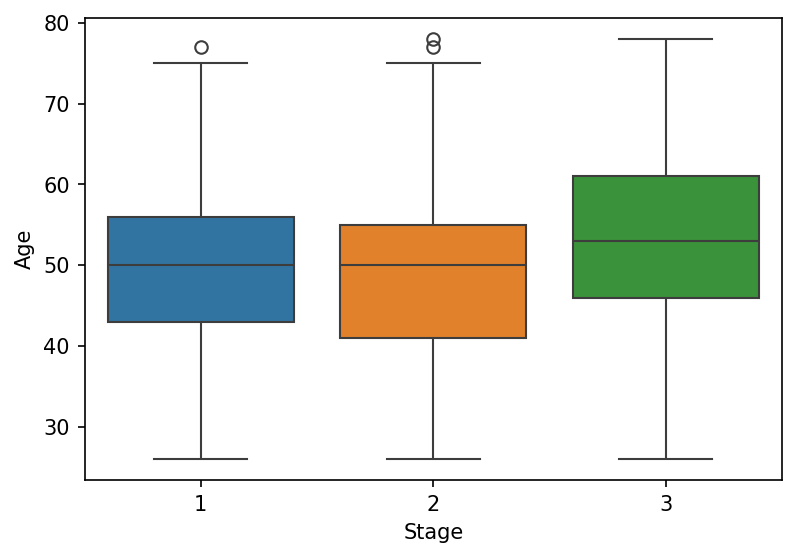

In [33]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(data=df,x='Stage',y='Age',palette='tab10');

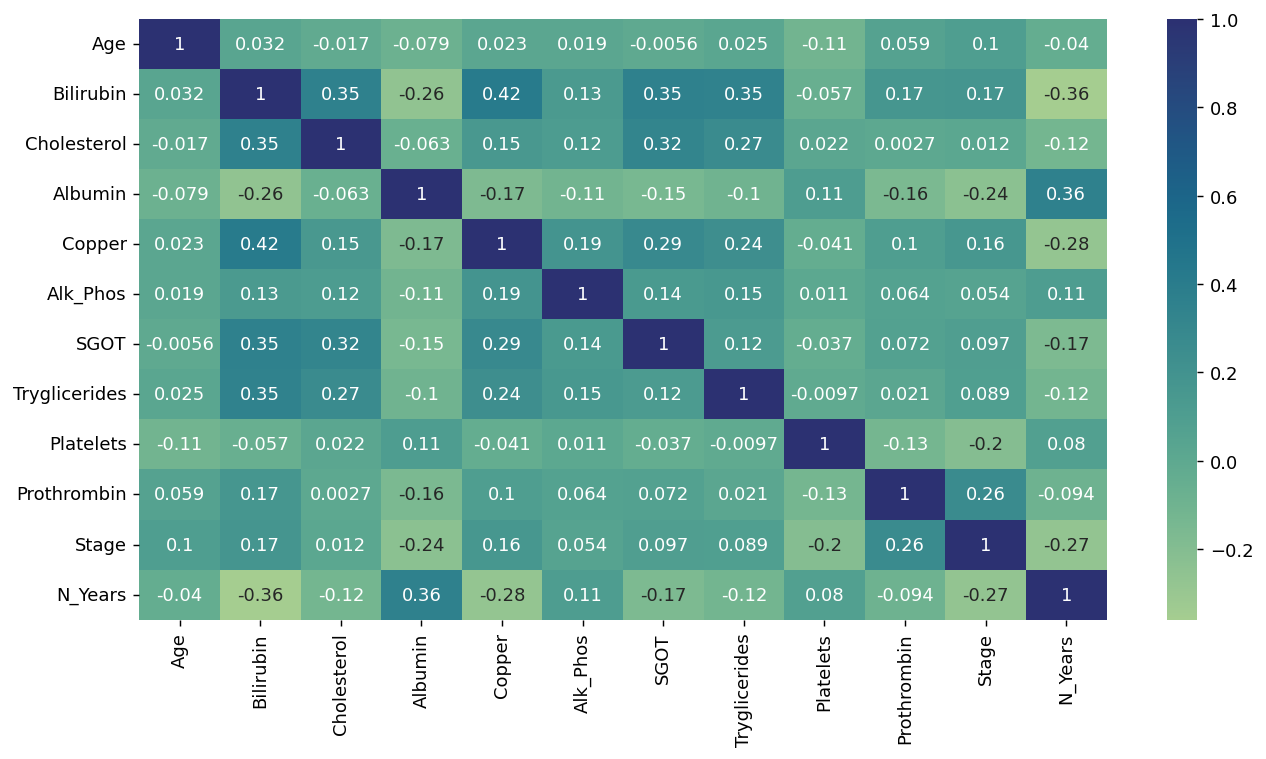

In [34]:
plt.figure(figsize=(12,6),dpi=130)
sns.heatmap(df_num.corr(),annot=True,cmap='crest');

DATA PREPERATION

In [35]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
categ = ['Status','Drug', 'Sex', 'Ascites',	'Hepatomegaly',	'Spiders',	'Edema']
df[categ] = df[categ].apply(LE.fit_transform)

In [36]:
df

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Years
0,0,1,51.0,0,0,1,0,0,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1,6.0
1,0,1,54.0,1,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2,3.0
2,0,1,32.0,0,0,0,0,0,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2,11.0
3,2,1,45.0,0,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2,6.0
4,2,1,59.0,0,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,0,1,49.0,0,1,0,1,0,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1,10.0
24971,0,1,64.0,0,1,0,1,0,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1,13.0
24972,2,0,67.0,0,0,1,0,0,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3,9.0
24991,0,0,58.0,0,0,0,0,0,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2,12.0


<ipython-input-37-9819d4f8557b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-37-9819d4f8557b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-37-9819d4f8557b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-37-9819d4f8557b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to

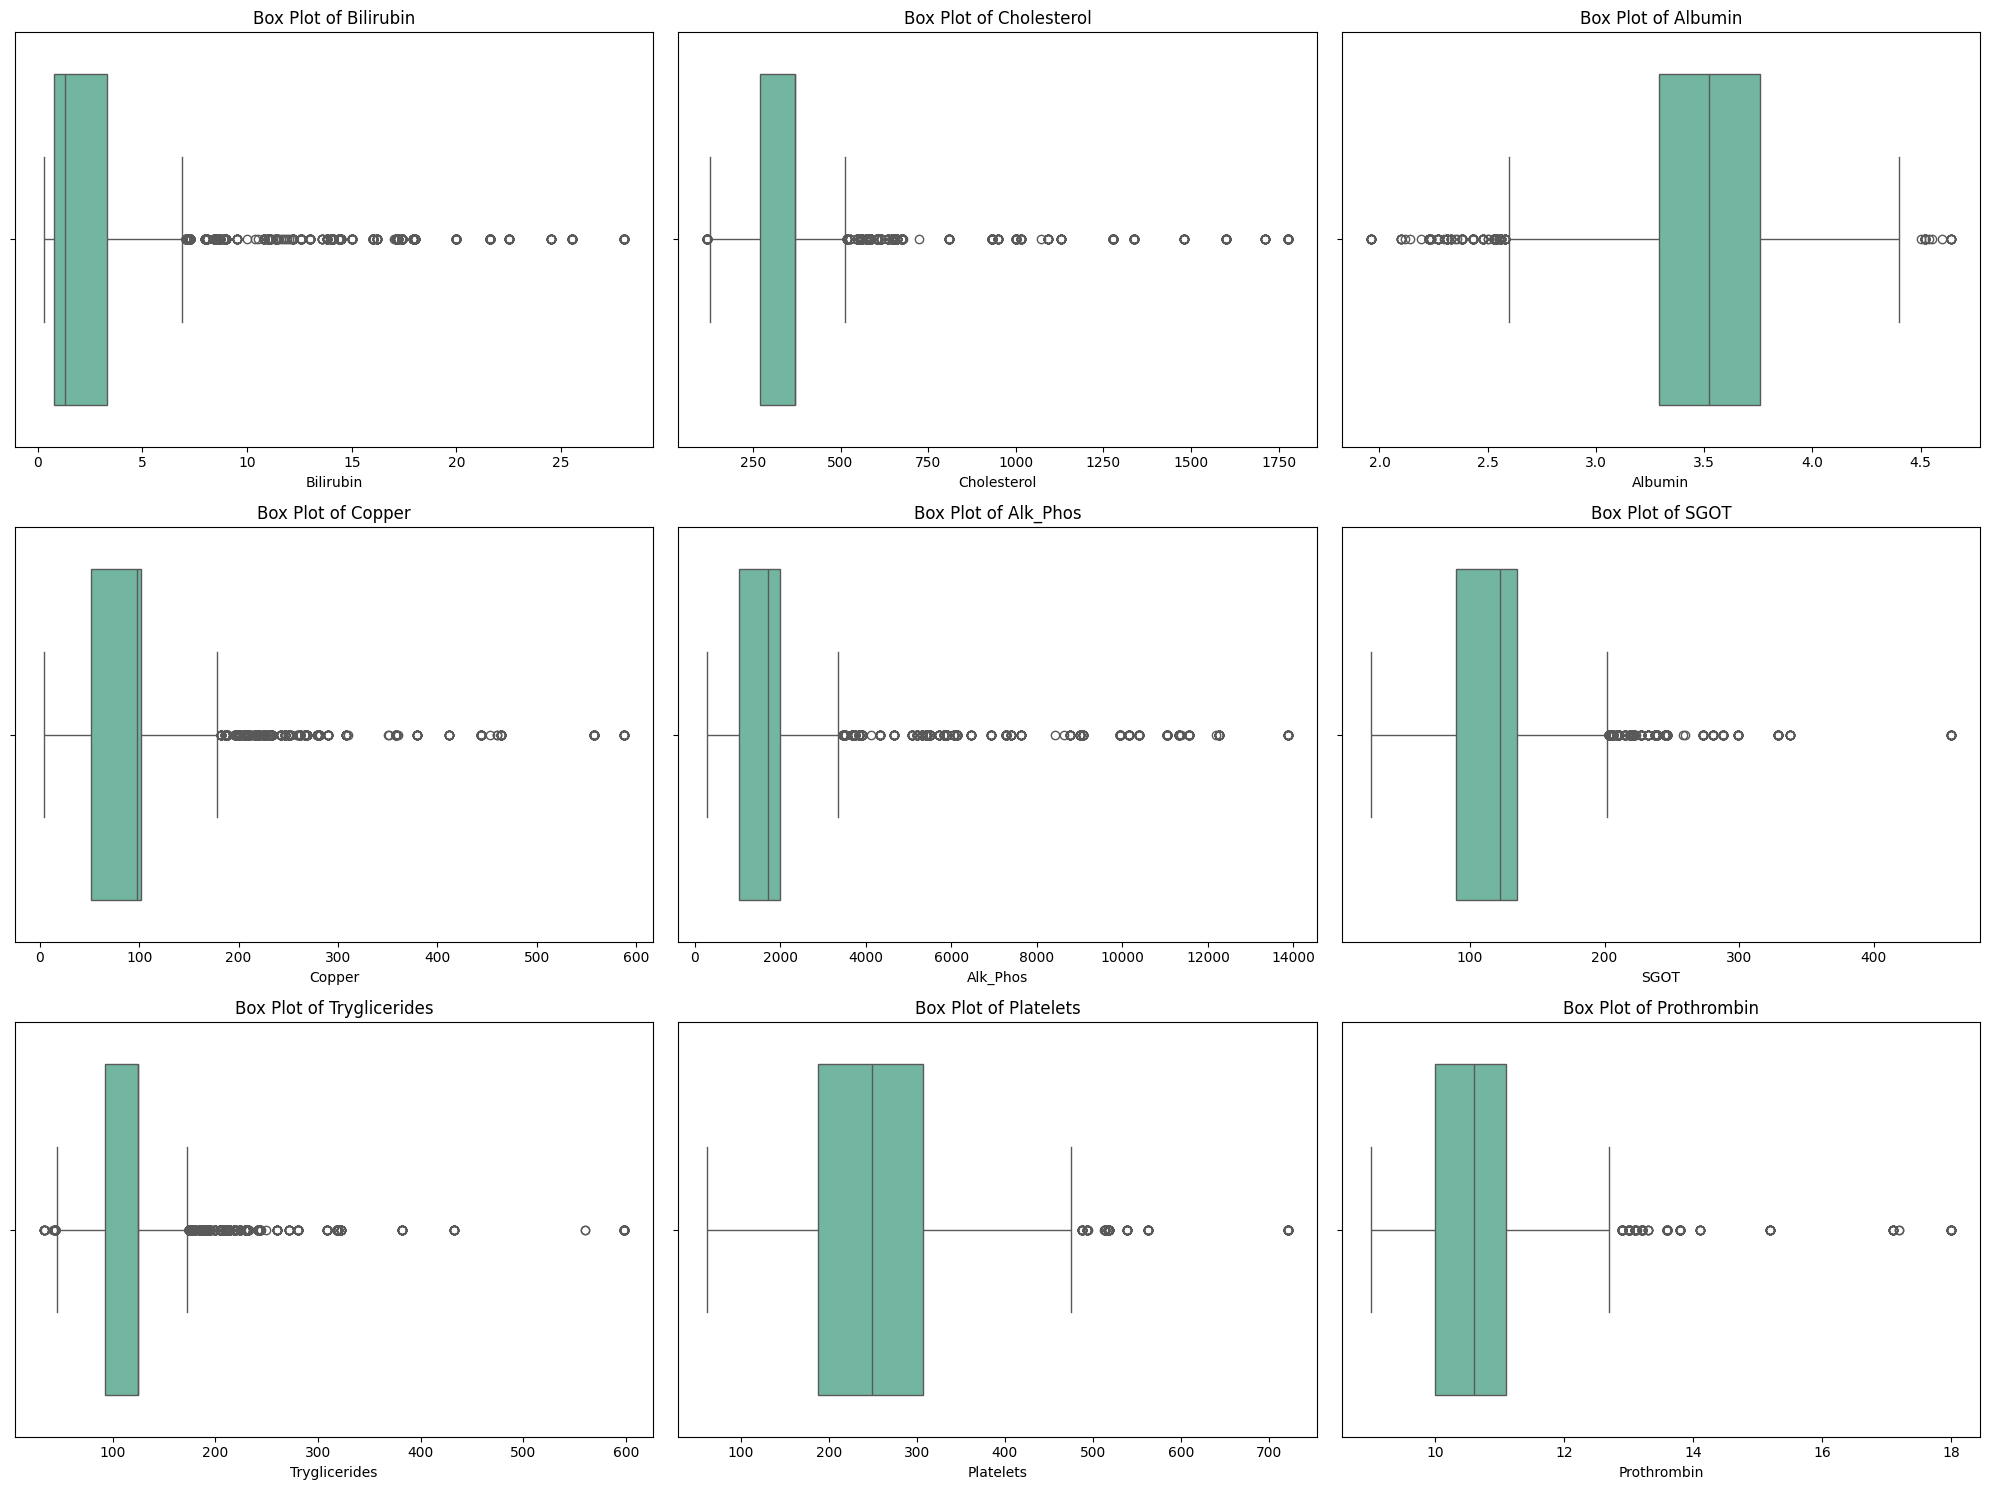

In [37]:
#checking for outlier

col = list(df_num.drop(['Stage','N_Years','Age'],axis=1).columns)
fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();


In [38]:
#Remove outlier using outlier capping

def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)


In [39]:
def cap(a):
    for i in a:
        df.loc[df[i] >= outlier(df[i])[1],i] = outlier(df[i])[1]
        df.loc[df[i] <= outlier(df[i])[0],i] = outlier(df[i])[0]

In [40]:
cap(df_num.drop('Stage',axis=1))

<ipython-input-41-a51dee0df1d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-41-a51dee0df1d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-41-a51dee0df1d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-41-a51dee0df1d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to

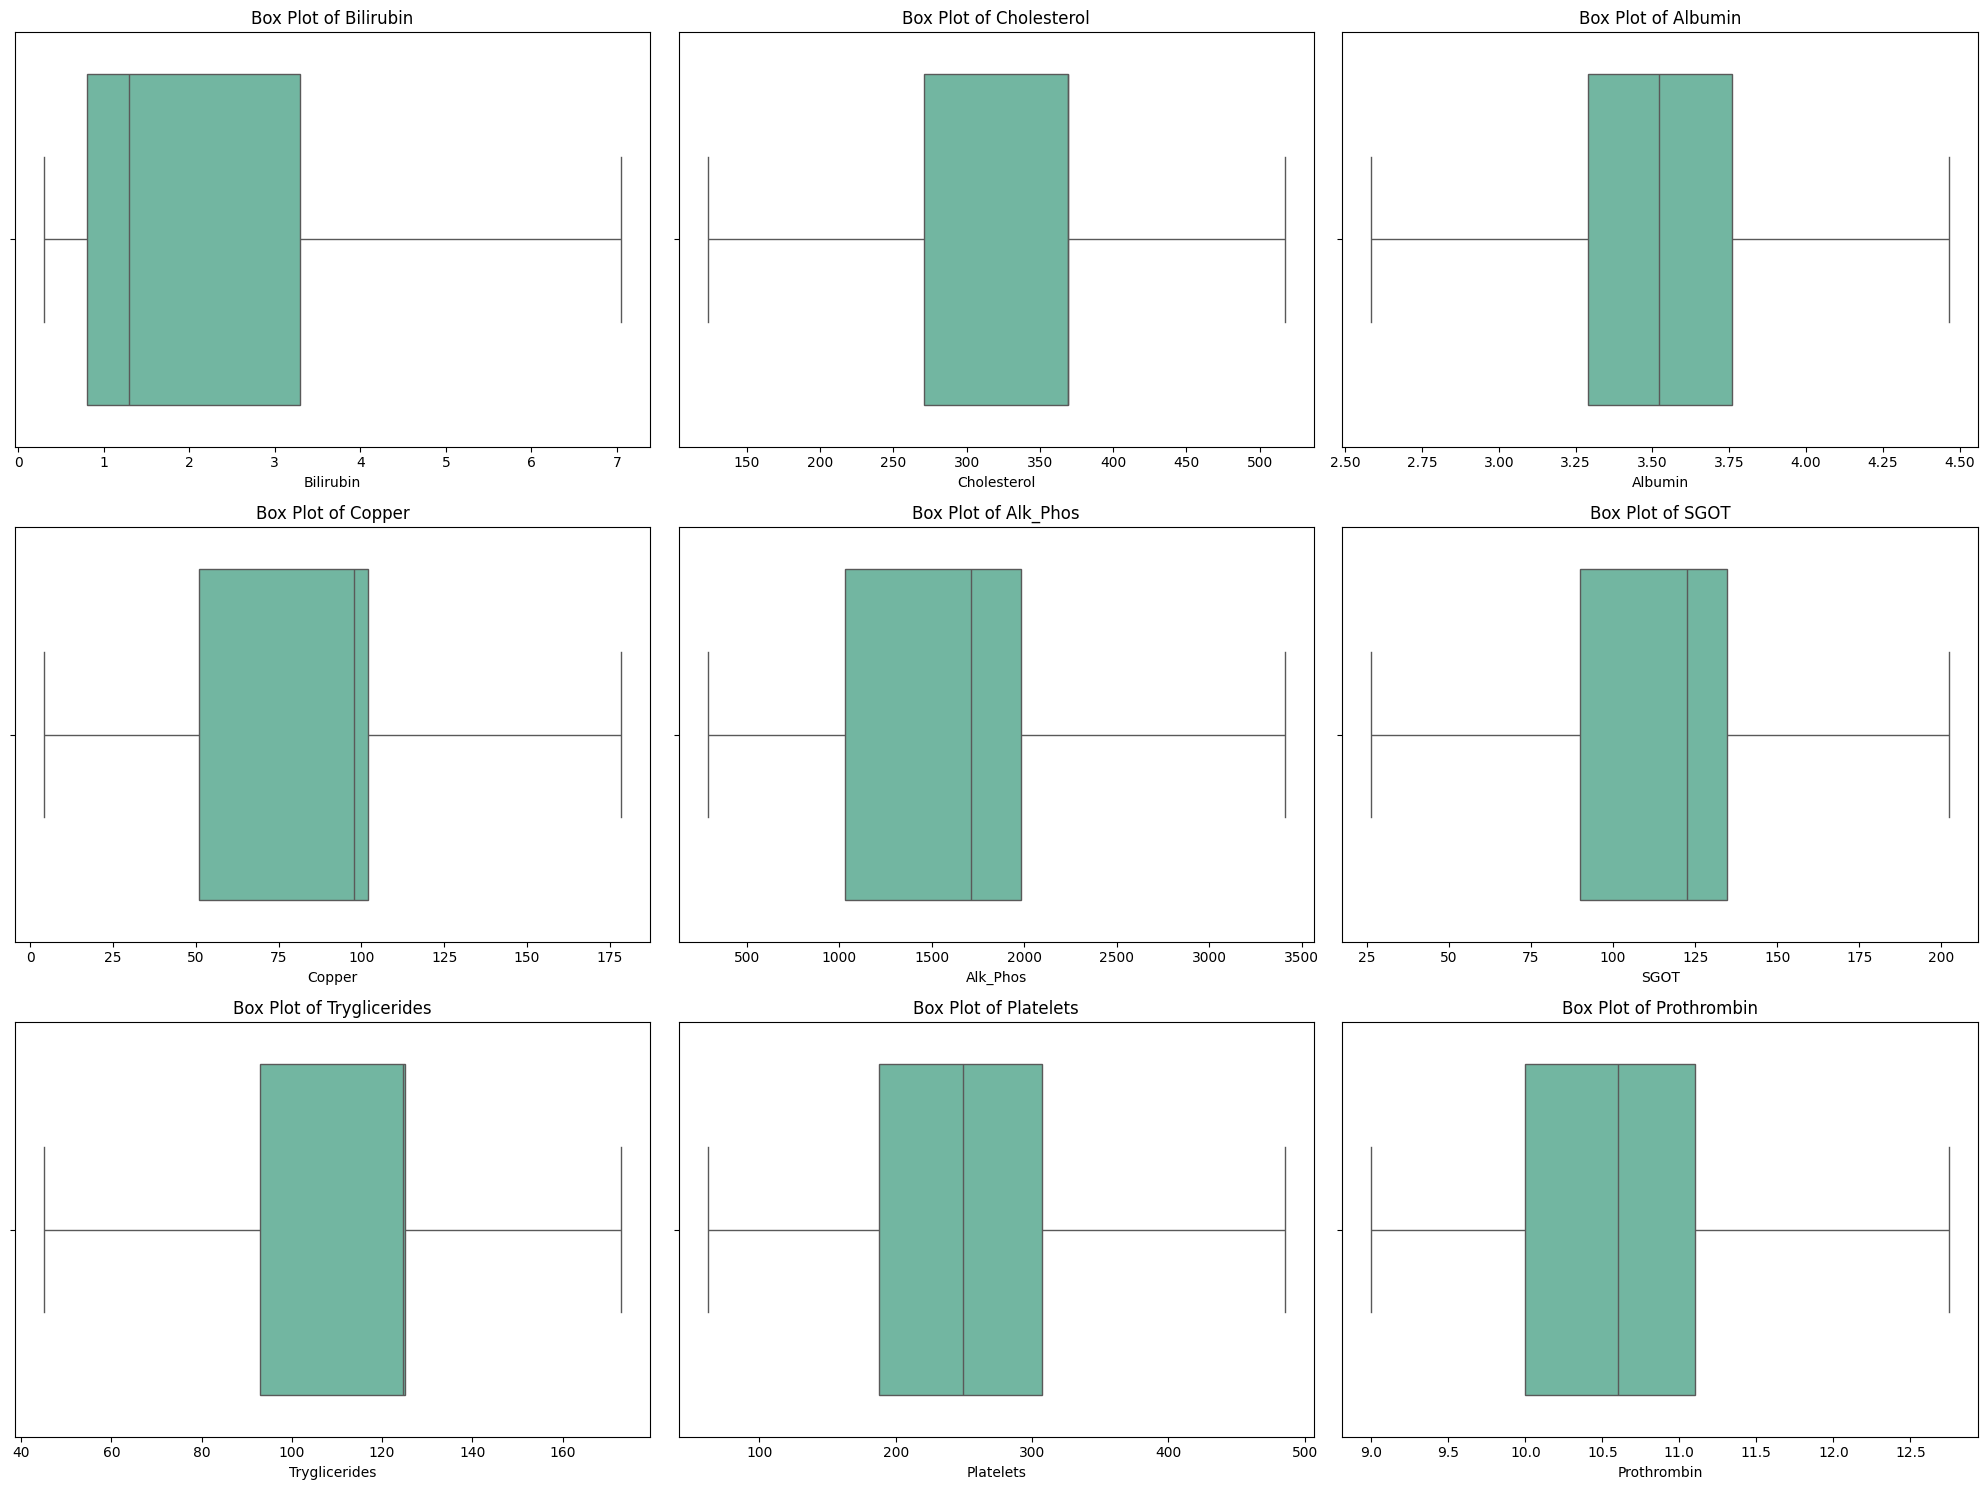

In [41]:
col = list(df_num.drop(['Stage','N_Years','Age'],axis=1).columns)
fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

In [42]:
x = df.drop(columns=['Stage'],axis=1)
y = df['Stage']

In [43]:
x

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,N_Years
0,0,1,51.0,0,0,1,0,0,0.5,149.000000,4.04,178.500000,598.000000,52.700000,57.000000,256.0,9.9,6.0
1,0,1,54.0,1,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,3.0
2,0,1,32.0,0,0,0,0,0,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,11.0
3,2,1,45.0,0,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,6.0
4,2,1,59.0,0,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,0,1,49.0,0,1,0,1,0,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,10.0
24971,0,1,64.0,0,1,0,1,0,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,13.0
24972,2,0,67.0,0,0,1,0,0,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,9.0
24991,0,0,58.0,0,0,0,0,0,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,12.0


In [44]:
y

,Stage
0,1
1,2
2,2
3,2
4,1
...,...
24963,1
24971,1
24972,3
24991,2


In [45]:
#Splitting of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [46]:
#Normalization or scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [47]:
x_train

array([[-0.87903112,  0.74116524, -1.54059247, ..., -1.72156665,
         1.04907276, -0.08195781],
       [-0.87903112,  0.74116524, -1.73793833, ..., -0.30652014,
        -0.87554185,  1.92834549],
       [-0.87903112,  0.74116524,  1.61694133, ...,  0.03091403,
         0.15091927, -0.7520589 ],
       ...,
       [-0.87903112,  0.74116524, -1.54059247, ..., -0.21944035,
        -0.87554185,  1.92834549],
       [ 0.16805432,  0.74116524, -1.54059247, ..., -1.72156665,
         0.92076512, -0.41700836],
       [ 0.16805432,  0.74116524, -1.14590074, ...,  2.52901537,
        -0.36231129, -1.08710945]])

In [48]:
x_test

array([[ 1.21513976,  0.74116524, -0.84988195, ..., -0.31740511,
        -0.23400365, -1.08710945],
       [-0.87903112, -1.34922679,  0.53153909, ..., -0.39359992,
         0.79245747,  0.58814329],
       [-0.87903112, -1.34922679,  0.13684736, ..., -0.57864447,
         1.56230332, -0.08195781],
       ...,
       [-0.87903112,  0.74116524, -0.94855488, ...,  0.64047253,
         0.15091927,  0.92319384],
       [-0.87903112,  0.74116524, -0.55386316, ..., -1.11200815,
        -0.61892657, -0.41700836],
       [ 1.21513976, -1.34922679, -0.15917143, ..., -0.54598955,
        -0.10569601,  1.92834549]])

Model Building

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
param_rfc = {'n_estimators': [int(x) for x in np.linspace(start=10,stop=80,num=10)],
             'max_features': ['log2','sqrt',None],
             'max_depth':[2,4,7,10]}
rfc_model = RandomForestClassifier()
gs_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = param_rfc,cv=3,n_jobs=4,error_score='raise')
gs_rfc_model.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 7, 10],
                         'max_features': ['log2', 'sqrt', None],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [51]:
gs_rfc_model.best_params_

{'max_depth': 10, 'max_features': None, 'n_estimators': 56}

In [52]:
rfc_model = gs_rfc_model.best_estimator_

In [53]:
rfc_preds = rfc_model.predict(x_test)

In [54]:
rfc_preds

array([3, 3, 2, ..., 2, 2, 1])

In [55]:
y_test

,Stage
17502,3
10063,3
889,2
16094,2
21914,3
...,...
20052,2
7057,2
4651,2
6172,2


In [56]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test,rfc_preds)
print(accuracy)

0.8106876553438277


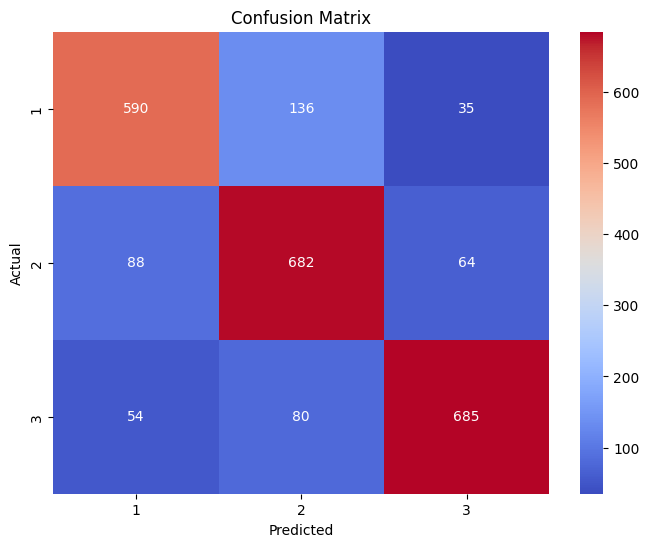

In [57]:
#confusion_matrix
conf_mat = confusion_matrix(y_test,rfc_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           1       0.81      0.78      0.79       761
           2       0.76      0.82      0.79       834
           3       0.87      0.84      0.85       819

    accuracy                           0.81      2414
   macro avg       0.81      0.81      0.81      2414
weighted avg       0.81      0.81      0.81      2414



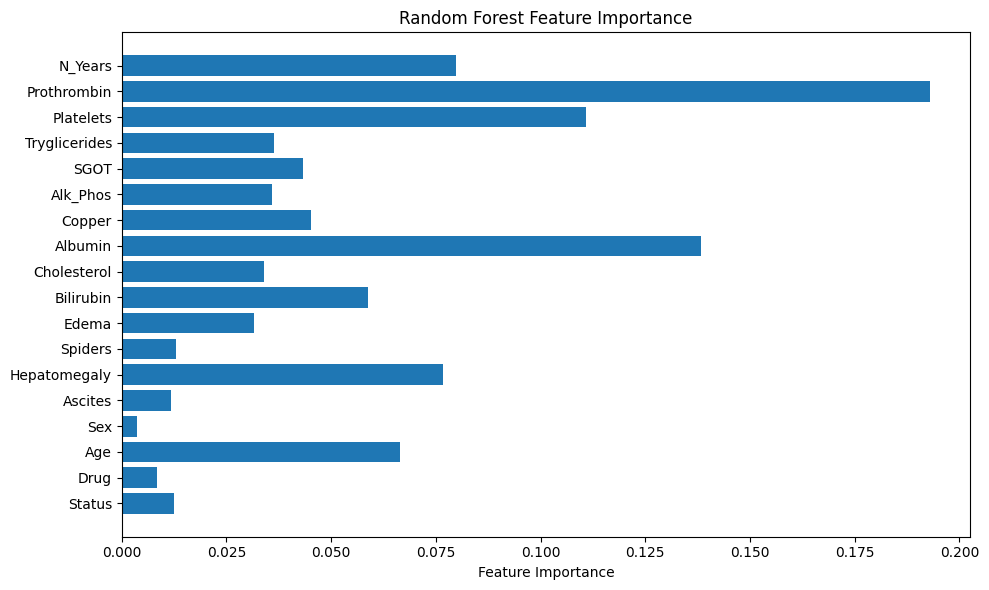

In [59]:
import matplotlib.pyplot as plt
importances = gs_rfc_model.best_estimator_.feature_importances_
feat_names = x.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
